In [1]:
from skimage import io

img_msk_path = '/home/tianhao/chence/DatProc/temp/samples/masks/000007.png'
img_msk_data = io.imread(img_msk_path)

In [ ]:
import cv2

# Load image
img = cv2.imread('path/to/image.jpg', 0)  # Load as grayscale

# Binarize image using Otsu's method
_, binary_img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display binary image
cv2.imshow('Binary Image', binary_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


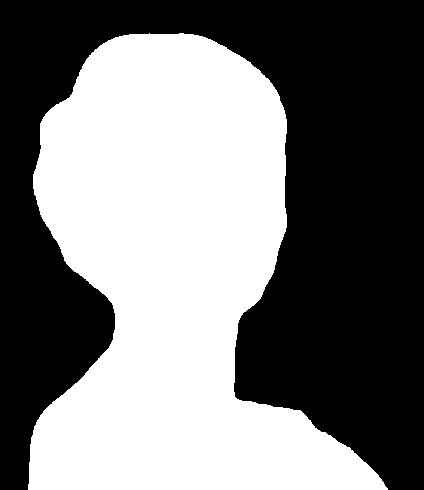

In [3]:
from PIL import Image

display(Image.fromarray(img_msk_data))

In [12]:
import os.path as osp
import cv2
import numpy as np
from skimage import io
from utils.fv_utils import crop_head_image
from utils.tool import R2hpose
from utils.fv_utils import rotate_image
from utils.fv_utils import generate_results
from utils.fv_utils import crop_head_parsing
from utils.bv_utils import estimate_rotation_angle, rotate_image, rotate_quad, get_final_crop_size
from utils.tool import hpose2camera

def process_image(img_path, img_msk_path=None, img_par_path=None, landmarks=None):
    # Check if image path exists
    if not osp.exists(img_path):
        raise ValueError('Image path does not exist')

    # Check if image is too small
    if not img_sz_flt(img_path):
        raise ValueError('Image size too small')

    # Load image data
    img_data = io.imread(img_path)  # RGB uint8 HW3 ndarray

    # Get head box and landmarks
    if landmarks is None:
        # Detect head box
        hed_boxes = hed_det(img_data, isBGR=False, max_box_num=1)
        if hed_boxes is None or hed_boxes.shape[0] == 0:
            raise ValueError('No head detected')
        box_np = np.array(hed_boxes[0])  # Coords in Raw Image
        head_image = crop_head_image(img_data.copy(), box_np)
        landmarks = flmk_det(head_image, isBGR=False, image_upper_left=box_np[:2])  # Coords in Raw Image
    else:
        landmarks = np.array(landmarks)  # Coords in Raw Image
        box_np = landmarks_to_bbox(landmarks)
        head_image = crop_head_image(img_data.copy(), box_np)  # Coords in Raw Image
    assert head_image.shape[0] == head_image.shape[1]

    # Process image with landmarks (front) or without landmarks (back)
    if landmarks is None:
        pass
    else:
        pass

    return img_data, box_np, landmarks

In [5]:
import cv2

# img_path = '/home/chence/Research/3DHeadGen/DatProc/samples/images/000031.png'
img_path = '/home/chence/Research/3DHeadGen/DatProc/temp/samples/images/man.jpg'

# ! After cropping, use blur filter to filter out images that are too blurry

In [18]:
img_data, box_np, landmarks = process_image(img_path)

In [ ]:
# from visualize.vis_2d import draw_detection_box, draw_facial_landmarks

# a = draw_detection_box(img_data.copy(), box_np, text='')
# a = cv2.resize(a, None, fx=0.25, fy=0.25, interpolation=cv2.INTER_LINEAR)
# b = draw_facial_landmarks(img_data.copy(), landmarks.astype(np.int32))
# b = cv2.resize(b, None, fx=0.25, fy=0.25, interpolation=cv2.INTER_LINEAR)

# from PIL import Image

# display(Image.fromarray(np.hstack([a, b])))

# lmbox = landmarks_to_bbox(landmarks)
# c = draw_detection_box(img_data.copy(), lmbox, text='')
# c = cv2.resize(c, None, fx=0.25, fy=0.25, interpolation=cv2.INTER_LINEAR)
# display(Image.fromarray(np.hstack([a, b, c])))

In [4]:
# if not img_br_flt(head_image, isBGR=True):
#     print('Image is filtered out!')
#     # exit(0)
# img_br_flt.get_blur_degree(head_image, isBGR=True)
# img_br_flt.get_blur_degree(cropped_img, isBGR=True)

In [21]:
import cv2

cv2.imwrite('/home/chence/Research/3DHeadGen/DatProc/temp/parsing/man_align.jpg', cropped_img)
cv2.imwrite('/home/chence/Research/3DHeadGen/DatProc/temp/parsing/man_head.jpg', head_image)

True

[0, 1, 2, 3, 4, 5, 7, 8, 10, 12, 13, 14, 16, 17]
uint8 14


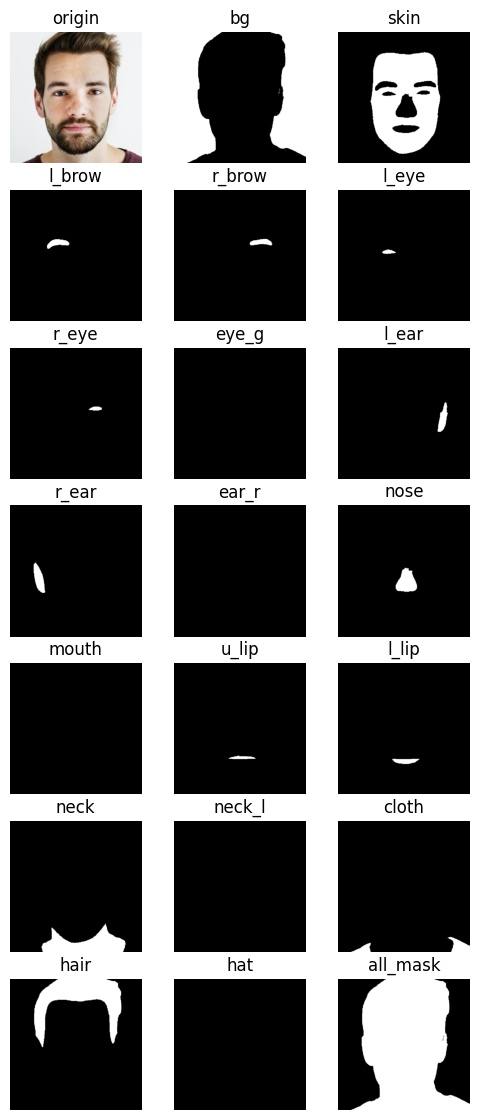

In [16]:
from visualize.vis_2d import show_parsing_result

show_parsing_result(cropped_img[..., ::-1], cropped_par, hed_par.label)